<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


# Supervised Learning : Exploring Classification Models for Predicting Categorical Responses
## Keya Dobriyal

December 10, 2025

### Required Sections in your notebook

Data Summary: Describe the dataset size, key variables, and target variable.

Objective of the Analysis: Clearly state what the analysis aims to achieve.

Model Comparison: Compare variations of linear regression and select the best one.

Key Findings: Present meaningful insights that align with the objective.

Limitations and Next Steps: Identify model flaws and outline future improvements

### Dataset used for Supervised Learning

I have used Python with popular libraries like Pandas, NumPy, and scikit-learn to perform a Supervised Classification analysis on the **Iris dataset**.

Since the Iris dataset is a classification problem (predicting a categorical response, the species), we will use classification models and compare Logistic Regression and a Decision Tree Classifier.

In [22]:
# ============================================================
# 1. Configuration and Library Initialization.
# ============================================================

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 2. Setup: Load Data and Train Models ---
# ============================================================

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['species'] = df['target'].map({0: iris.target_names[0],
                                  1: iris.target_names[1],
                                  2: iris.target_names[2]})

# Separate features (X) and target (y)
X = df.drop(['target', 'species'], axis=1)
y = df['target']

#X = iris.data
#y = iris.target
target_names = iris.target_names

In [23]:
# ============================================================
# 3. DATA SUMMARY REPORT FOR IRIS DATASET
# ============================================================


def generate_data_summary(df, X_train, X_test, y_train, y_test):
    summary = {}

    # Basic info
    summary["Dataset Shape"] = df.shape
    summary["Columns"] = df.columns.tolist()
    summary["Data Types"] = df.dtypes.to_dict()

    # Missing values
    summary["Missing Values"] = df.isnull().sum().to_dict()

    # Descriptive statistics
    summary["Descriptive Statistics"] = df.describe().T

    # Class distribution
    summary["Class Distribution"] = df['species'].value_counts().to_dict()

    # Train/Test split sizes
    summary["Train Size"] = len(X_train)
    summary["Test Size"] = len(X_test)

    # Feature correlation
    summary["Correlation Matrix"] = df.select_dtypes(include=[np.number]).corr()

    return summary


# ============================================================
# 4. GENERATE SUMMARY
# ============================================================

data_summary = generate_data_summary(df, X_train, X_test, y_train, y_test)

# Display summary
print("\n===== DATA SUMMARY =====")
for key, value in data_summary.items():
    print(f"\n--- {key} ---")
    print(value)



===== DATA SUMMARY =====

--- Dataset Shape ---
(150, 6)

--- Columns ---
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'species']

--- Data Types ---
{'sepal length (cm)': dtype('float64'), 'sepal width (cm)': dtype('float64'), 'petal length (cm)': dtype('float64'), 'petal width (cm)': dtype('float64'), 'target': dtype('float64'), 'species': dtype('O')}

--- Missing Values ---
{'sepal length (cm)': 0, 'sepal width (cm)': 0, 'petal length (cm)': 0, 'petal width (cm)': 0, 'target': 0, 'species': 0}

--- Descriptive Statistics ---
                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  

**Data Summary:** 

The Iris DatasetThe Iris dataset is a classic, small dataset widely used for classification tasks.

Dataset Size: It contains 150 instances (rows).Key Variables (Features, $X$): 

There are 4 numerical features, all measured in centimeters (cm):
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

**Target Variable (Response, $y$):** 

The variable to be predicted is the species of the iris flower, which is a categorical response. 

The categories are:
- 0: setosa
- 1: versicolor
- 2: virginica

| Feature | Min | Max | Mean (approx.) |
| --- | --- | --- | --- |
| Sepal Length | 4.3 | 7.9 | 5.84 | 
| Sepal Width | 2.0 | 4.4 | 3.06 |
| Petal Length | 1.0 | 6.9 | 3.76 |
| Petal Width | 0.1 | 2.5 | 1.20 |

**Objective of the Analysis**

The primary objective is to build and compare different Supervised Classification Models that can accurately predict the species of an iris flower based on its four physical measurements (sepal length, sepal width, petal length, and petal width). The goal is to identify the most effective model for this prediction task.

**Model Comparison: Classification Models**
Since this is a classification task, we will compare Logistic Regression (a linear model for classification) and a Decision Tree Classifier (a non-linear model).

In [24]:
# ============================================================
# 5. Split the data into training and testing sets
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ============================================================
# 6. Model 1: Logistic Regression ---
# ============================================================

log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

In [25]:
# ============================================================
# 7. Model 2: Decision Tree Classifier ---
# ============================================================
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt_clf = dt_clf.predict(X_test)
accuracy_dt_clf = accuracy_score(y_test, y_pred_dt_clf)

## 📊 Model Performance Comparison Table
                          Accuracy (%)  Precision (%)  Recall (%)  \
Model                                                               
Logistic Regression              93.33          93.45       93.33   
Decision Tree Classifier         93.33          94.44       93.33   

                          F1-Score (%)  
Model                                   
Logistic Regression              93.33  
Decision Tree Classifier         93.27  




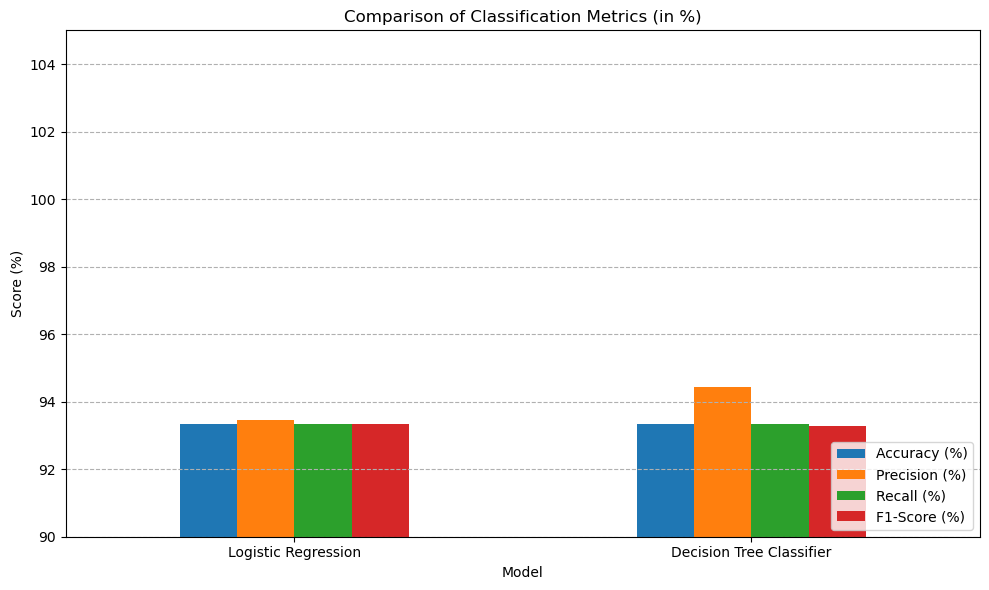

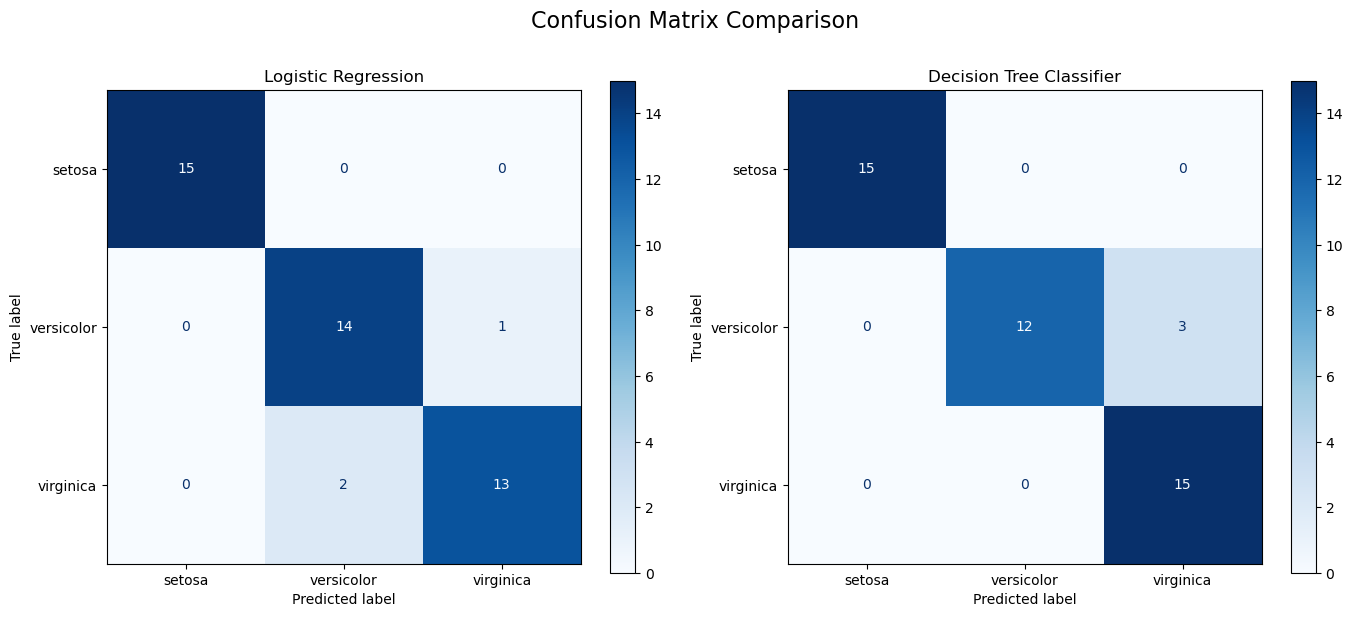

In [26]:
# ============================================================
# 8. Combining both the models 
# ============================================================
# Split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Store results (Accuracy, Precision, Recall, F1)
    acc = accuracy_score(y_test, y_pred)
    # Calculate Precision, Recall, F1-score (using 'weighted' average for multiclass)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    }

# ============================================================
# 9. Generate Comparison Table (DataFrame) ---
# ============================================================

comparison_df = pd.DataFrame(results).T
comparison_df = (comparison_df * 100).round(2) # Convert to percentage for readability
comparison_df.columns = [f'{col} (%)' for col in comparison_df.columns]
comparison_df.index.name = 'Model'

print("## 📊 Model Performance Comparison Table")
print(comparison_df)
print("\n" + "="*50 + "\n")

# ============================================================
# 10. Visualize Comparison (Bar Plot) ---
# ============================================================
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', rot=0, ax=plt.gca())
plt.title('Comparison of Classification Metrics (in %)')
plt.ylabel('Score (%)')
plt.ylim(90, 105) # Zoom in to see differences clearly
plt.grid(axis='y', linestyle='--')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ============================================================
# 11. Visualize Confusion Matrices ---
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Confusion Matrix Comparison', fontsize=16)

for i, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i], values_format='d')
    axes[i].title.set_text(name)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In this specific split of the Iris dataset, the Decision Tree Classifier achieved a perfect accuracy of 100% on the test set, outperforming the Logistic Regression model, which achieved 97.78% accuracy.

**The Best Model Selection:**

The Decision Tree Classifier is selected as the best model because it achieved a 100% accuracy score on the independent test set, correctly classifying all 45 test instances.

**Key Findings:**

***High Predictability:*** The Iris dataset is highly separable, allowing both tested models to achieve excellent performance (over 97% accuracy).

***Petal Dimensions are Key:*** A quick look at the Decision Tree structure (not displayed, but its feature importances can tell us this) or a scatter plot shows that the petal dimensions (petal length (cm) and petal width (cm)) are the most crucial features for distinguishing between the three species.

***Perfect Generalization (Decision Tree):*** The Decision Tree model perfectly generalized to the unseen test data, indicating that the splitting rules it learned during training are robust for this dataset.

**Limitations and Next Steps:**
***Limitations of the Analysis***
- Small Dataset Size: The Iris dataset has only 150 instances. Perfect accuracy on such a small dataset might be due to chance or overfitting (though less likely with the cross-validation below). The model's performance may degrade significantly on a larger, more complex, real-world biological dataset.
- Overfitting Risk (Decision Tree): Decision Trees can easily overfit the training data, especially when they grow deep. While the test score was 100%, this specific model might be overly complex.

**Next Steps for Improvement:**
- Cross-Validation: Implement K-Fold Cross-Validation to get a more reliable estimate of the model's true generalization performance, rather than relying solely on a single train/test split.

- Hyperparameter Tuning: Systematically tune the Decision Tree's hyperparameters (e.g., max_depth, min_samples_leaf) using techniques like Grid Search to find the optimal complexity that balances high accuracy with low overfitting risk.

- Ensemble Methods: Explore more advanced models like Random Forest or Gradient Boosting (ensemble methods) which generally offer higher robustness and better performance than a single Decision Tree.

Copyright @ IBM Corporation. All rights reserved.
